In [40]:
import numpy as np
import pandas as pd
from pandas import Series ,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [41]:
data=pd.read_csv(r"C:\Users\hp\Desktop\Data Science Activites\CLASSIFICATION LARK ACTIVITY\student-data.csv")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


In [42]:
data.shape

(395, 31)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [44]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [45]:
x=data.drop(['passed'],axis=1)
y=(data['passed'])

In [46]:
#label encoding
from sklearn.preprocessing import LabelEncoder


In [47]:
label_encoders = {}
binary_features= ['school','sex','address','famsize','Pstatus',
                  'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']   

for i in binary_features:
    label_encoders[i] = LabelEncoder()
    x[i] = label_encoders[i].fit_transform(x[i])  

In [48]:
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,at_home,teacher,...,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,0,1,1,1,at_home,other,...,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,1,1,1,1,at_home,other,...,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,0,1,4,2,health,services,...,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,0,1,3,3,other,other,...,1,0,0,4,3,2,1,2,5,4


In [49]:
#applying one encoding for Mjob and Fjob
x=pd.get_dummies(x)
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


In [50]:
x.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,1.448101,2.035443,...,0.549367,0.281013,0.073418,0.367089,0.275949,0.091139,0.265823,0.227848,0.691139,0.081013
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,...,0.498188,0.450064,0.261152,0.482622,0.447558,0.288172,0.442331,0.419976,0.462610,0.273201
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
y.head()

0     no
1     no
2    yes
3    yes
4    yes
Name: passed, dtype: object

# Performing Min Max scaling 
from sklearn import preprocessing  
min_max = preprocessing.MinMaxScaler(feature_range =(0,1))
x = min_max.fit_transform(x)

In [51]:
#spliting of data
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
# split outcome
data.shape

(395, 31)

In [53]:
x_train.shape

(316, 43)

# training the model

Using some of the commonly used algorithms, we will be training our model to find the most effective model that uses the least
amount of computation costs . We will be implementing the following algorithms to compare:

#1.logistic regression

In [78]:
y_test.dtype



dtype('O')

In [62]:
y_pred.dtype

dtype('O')

In [ ]:
import time

In [84]:
start_time = time.time()
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_predict=logit_model.predict(x_test)

end_time = time.time()


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [86]:
accuracy_score(y_predict,y_test)

0.7088607594936709

In [87]:
confusion_matrix(y_test,y_predict)

array([[10, 17],
       [ 6, 46]], dtype=int64)

In [88]:
time_taken = end_time - start_time

In [89]:
time_taken

0.05644083023071289

# KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    classifier.fit(x_train,y_train)
    y_predict=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predict)
    acc_values.append(acc)
end_time = time.time()

In [94]:
acc_values

[0.6582278481012658,
 0.6455696202531646,
 0.6708860759493671,
 0.6329113924050633,
 0.6455696202531646,
 0.6582278481012658,
 0.6708860759493671,
 0.6835443037974683,
 0.6455696202531646,
 0.6708860759493671,
 0.6962025316455697,
 0.6962025316455697]

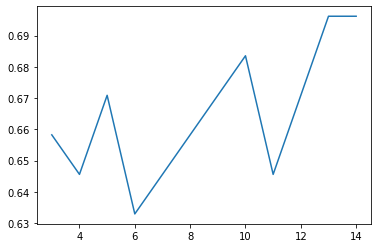

In [95]:
plt.plot(neighbors,acc_values,)

accuracy value is high when k is 7

In [97]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski')
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
accuracy_score(y_test,y_predict)

0.6962025316455697

In [98]:
confusion_matrix(y_test,y_predict)

array([[ 6, 21],
       [ 3, 49]], dtype=int64)

In [99]:
time_taken = end_time - start_time
time_taken

0.15626096725463867

# DecisionTreeClassifier

In [100]:
from sklearn.tree import DecisionTreeClassifier


In [101]:
start_time = time.time()
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_predict=dt_model.predict(x_test)
end_time=time.time()

In [102]:
accuracy_score(y_test,y_predict)

0.6962025316455697

In [103]:
confusion_matrix(y_test,y_predict)

array([[12, 15],
       [ 9, 43]], dtype=int64)

In [104]:
time_taken = end_time - start_time
time_taken

0.016936302185058594

# RANDOMFORESTCLASSIFIER

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
start_time=time.time()
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
y_predict=RFC.predict(x_test)
end_time=time.time()

In [107]:
accuracy_score(y_test,y_predict)

0.6835443037974683

In [108]:
confusion_matrix(y_test,y_predict)

array([[ 5, 22],
       [ 3, 49]], dtype=int64)

In [110]:
time_taken=end_time-start_time
time_taken

0.22329068183898926

# GRADIENTBOOSTINGCLASSIFIER

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
start_time=time.time()
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_predict=GBC.predict(x_test)
end_time=time.time()

In [113]:
accuracy_score(y_test,y_predict)

0.6835443037974683

In [114]:
confusion_matrix(y_test,y_predict)

array([[ 9, 18],
       [ 7, 45]], dtype=int64)

In [115]:
time_taken = end_time - start_time
time_taken

0.17603564262390137

In [ ]:
#The most accurate model is Logistic regression which has the Maximum Accuracy score and the time taken is also less